# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**Boundary + Initial + Source**](#Boundary-+-Initial-+-Source)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [4]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
domain=Boundary_Mat['domain']

```fortran
tra(:, :, 1, jpmyt1) = ((Ba(:, :)-trn(:, :, 1, jpmyt1))*rnf(:, :)+(0-trn(:, :, 1, jpmyt1))*ice2o(:, :))/e3t(:, :, 1)/1000.0
```

In [5]:
ptrc_obj = nc.Dataset('_data\\ALL01_1m_00010101_00041001_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [6]:
Ba.shape

(45L, 31L, 149L, 182L)

In [7]:
Ba_masked = np.ma.masked_where(((domain==0) | (Ba[44, 0, :, :]==0)), Ba[44, 0, :, :])

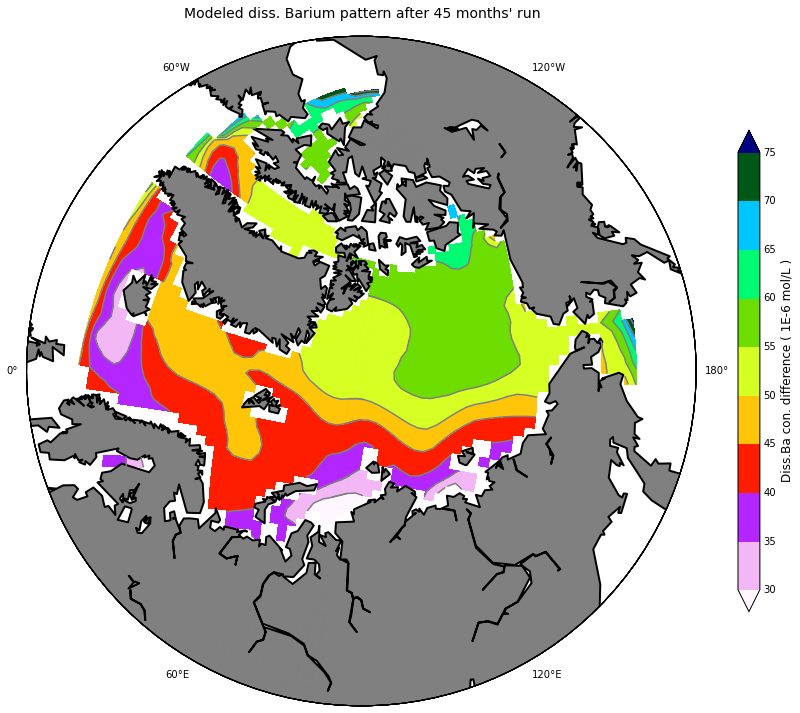

In [9]:
lev = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.contourf(x, y, Ba_masked, lev, cmap=plt.cm.gist_ncar_r, extend='both')
proj.contour(x, y, Ba_masked, lev, linewidths=1.5, colors=('gray',))
# Frame
proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
# Legend
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Diss.Ba con. difference ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_title("Modeled diss. Barium pattern after 45 months' run", fontsize=14, y=1.02)

#fig.savefig('Ba_simulation_result.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
#            transparent=False, bbox_inches='tight', pad_inches=0)

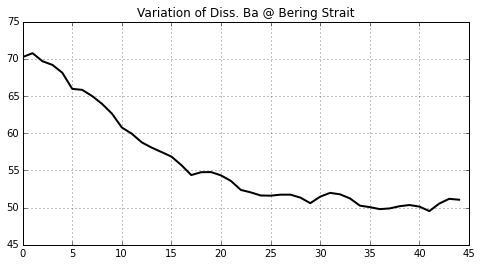

In [12]:
BC = Ba[:, 0, 122, 55]
fig = plt.figure(figsize=(8, 4))
ax = fig.gca();ax.grid()
ax.plot(BC, 'k-', lw=2)
ax.set_title('Variation of Diss. Ba @ Bering Strait')